딥러닝 파이토치 교과서 ch4 p.138~163

### **[개념 정리+코드 필사]📝**

# **Chapter4. 딥러닝 시작**

### **4.1 인공신경망의 한계와 딥러닝 출현**

- 퍼셉트론: 다수의 신호를 입력받아 하나의 신호로 출력. 신호 흐름(1), 신호 안흐름(0)의 정보를 전달함. 딥러닝의 기원이 되는 알고리즘
- AND 게이트: 모든 입력이 "1"일때 작동
- OR 게이트: 둘중 하나만 "1"이거나 둘다"1"일때 작동
- XOR 게이트: 둘중 하나만 "1"일 때 작동. 비선형 분리이므로 단층 퍼셉트론으로는 학습 불가능 -> 입력층과 출력층 사이에 하나 이상의 중간층(은닉층)을 두어 다층 퍼셉트론을 고안
  - 심층신경망: 여러 은닉층이 있는 신경망 = 딥러닝

### **4.2 딥러닝 구조**

4.2.1 딥러닝 용어

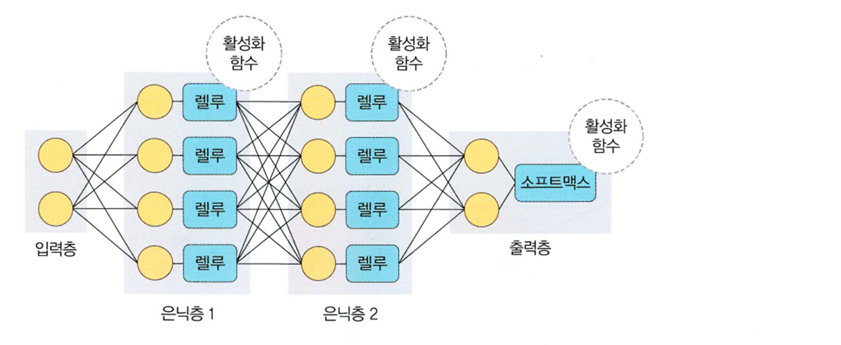
- 입력층: 데이터를 받는 층 / 은닉층: 모든 입력 노트에서 입력값을 받아 가중합을 계산하고 활성화함수에 적용하여 출력층에 전달하는 층 / 출력층: 신경망의 최종 결괏값이 포함된 층

- 가중치: 노드와 노드 간 연결 강도
  - 입력값이 연산결과에 미치는 영향력을 조절.
  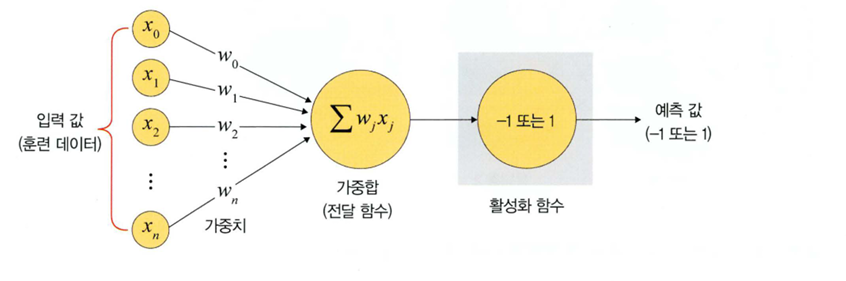
- 바이어스: 가중합에 더하는 상수. 출력값을 조절


- 가중합, 전달함수: 각 노드로 들어오는 신호와 가중치를 곱해 모두 합한 것
  - 노드의 가중합이 계산되면 활성화 함수로 보냄
  - $Σ{w_i}{x_i} + b$ (w:가중치, b: 바이어스)
  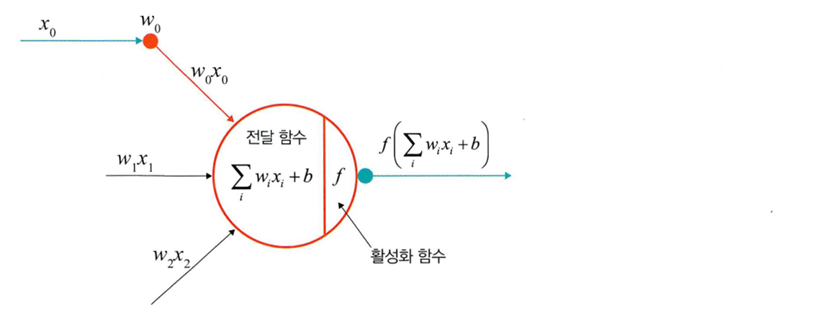

- **활성화 함수**: 신호를 입력받아 처리해 출력하는 함수
  - 전달받은 값을 일정 기준에 따라 출력 값 변화시키는 비선형 함수
  - (1) 시그모이드 함수: 선형 함수의 결과를 0~1 사이의 비선형 형태로 변형. 로지스틱 회귀 같은 분류에서 확률적 표현할 때 사용. 기울기 소멸 문제로 딥러닝에서는 잘 사용X
  $$
    f(x) = \frac{1}{1 + e^{-x}}
  $$
    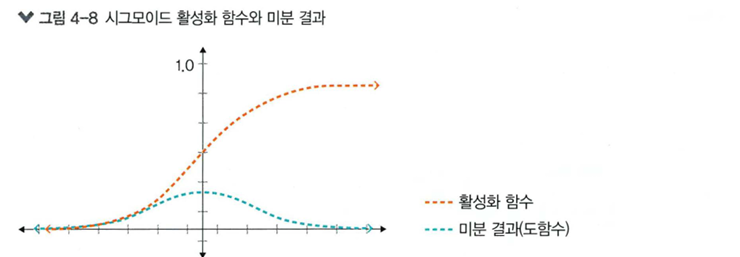
  - (2) 하이퍼볼릭 탄젠트 함수: 선형 함수의 결과를 -1~1 사이의 비선형 형태 변형. 기울기 소멸 문제 여전히 발생
    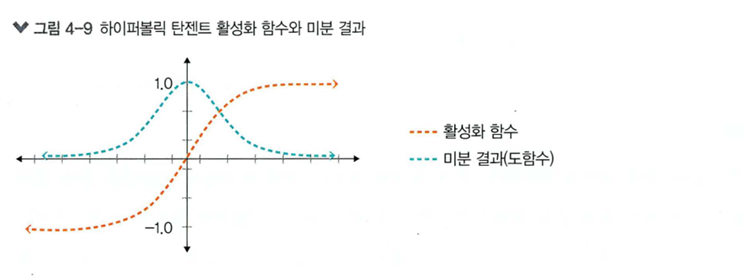
  - (3) 렐루 함수(ReLU): 음수일때는 0, 양수일때는 x를 출력. 경사하강법에 영향을 주지 않아 학습 속도가 빠르고 기울기 소멸문제X, 은닉층에서 일반적으로 사용.
    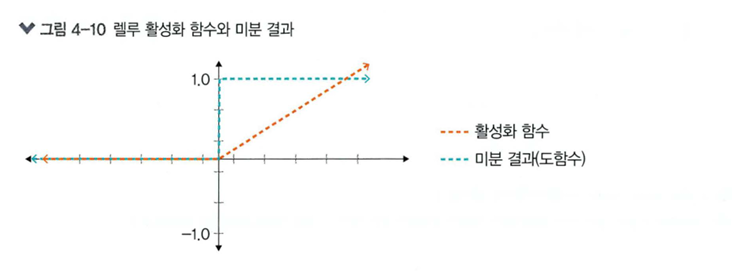
  - (4) 리키 렐루 함수(Leaky ReLU): 입력값이 음수이면 0이 아닌 0.001 같은 작은 수 반환. 수렴 구간이 없어져 렐루함수의 문제점 해결
    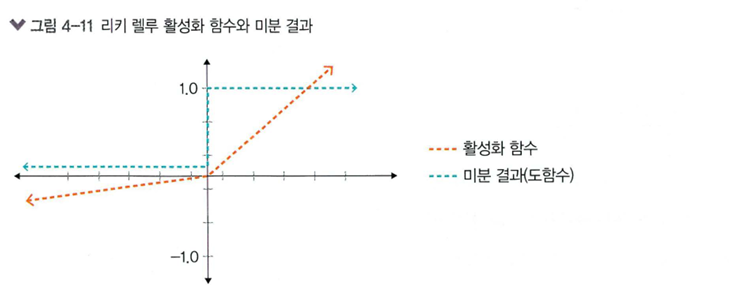
  - (5) 소프트맥스 함수: 함수 입력값을 0~1 사이로 출력되도록 정규화하여 출력 값들의 총합이 1이 되도록 함. 딥러닝에서 주로 출력노드의 활성화 함수로 사용.
  $$
    y_k = \frac{exp(a_k)}{Σ exp(a_i)}
  $$
    - n은 출력층의 노드 개수, k번째 출력.

In [2]:
import torch

In [3]:
# 렐루 함수와 소프트 맥수 함수 파이토치에서 구현
class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden) # 은닉층
    self.relu = torch.nn.ReLu(inplace=True)
    self.out = torch.nn.Lienar(n_hidden, n_output) # 출력층
  def forward(self, x):
    x = self.hidden(x)
    x = self.relu(x) # 은닉층을 위한 활성화 함수
    x = self.out(x)
    x = self.softmax(x) # 출력층을 위한 소프트맥스 활성화 함수
    return x

- **손실함수**: 가중치 학습을 위해 출력 함수의 결과와 실제 값 간의 오차를 측정하는 함수
  - 경사하강법: 학습률과 손실 함수의 순간 기울기를 이용해 가중치 업데이트하는 방법. 미분의 기울기로 오차 비교, 최소화하는 방향으로 이동. 오차는 손실함수로 구함
  - 학습으로 얻은 추정치가 실제 데이터와 얼마나 차이나는지 평가하는 지표. 0에 가까울수록 추정이 완벽해짐
  - (1) 평균 제곱 오차(MSE): 실제 값과 예측값의 차이를 제곱해 평균. 작을수록 예측력이 좋음. 회귀에서 손실함수로 주로 사용
  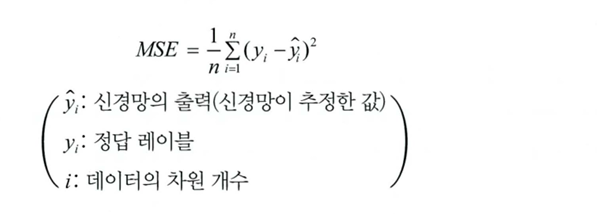
  ```
loss_fn = torch.nn.MESLoss(reduction='sum')
y_pred = model(x)
loss = loss_fn(y_pred, y)
  ```
  - (2) 크로스 엔트로피 오차: 분류에서 원핫인코딩 시 사용하는 오차 계산법.
  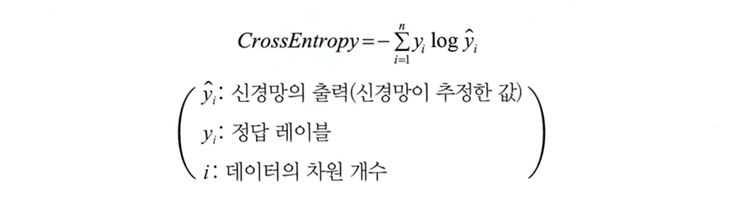
  ```
loss = nn.CrossEntropyLoss()
input = torch.randn(5, 6, requires_grad=True)   # 평균이 0이고 표준편차가 1인 가우시안 정규분포로 생성
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)   # dtype torch.float32의 랜덤한 값으로 채워진 텐서 반환
output.backward()
  ```
    - MSE + 시그모이드 활성화 함수 결합 -> 기울기가 매끄럽지 못해 학습 속도가 매우 늦음
    - 크로스 엔트로피 오차 + 시그모이드 -> 두개의 확률 분포 차이를 이용하므로 시그모이드 영향을 덜 받아 학습속도가 빠름

4.2.2 딥러닝 학습

- 순전파: 입력층 -> 은닉층 -> 출력층
  - 네트워크에 훈련 데이터가 들어올 때 발생. 데이터 기반 예측값을 계산하기 위해 1. 전체 신경망을 교차해 지나가서(이전층의 뉴런 수신 정보 변환 -> 다음 층의 뉴런 전송) 최종 층에 도달. 2. 손실 함수로 네트워크의 예측 값과 실제 값의 차이 추정.

- 역전파: 출력층 -> 은닉층 -> 입력층
  - 손실이 계산되면 역으로 전파. 가중치를 조절하며 훈련 반복하기 위함(손실비용0에 가까워지도록)
  - 은닉층의 뉴런은 상대적 기여도에 따라 값이 달라지며 (손실을 각 뉴런의 가중치로 미분한 후 기존 가중치 값에서 뺌) 이를 다시 순전파의 가중치 값으로 사용
  - 즉, 가중치 업데이트 과정
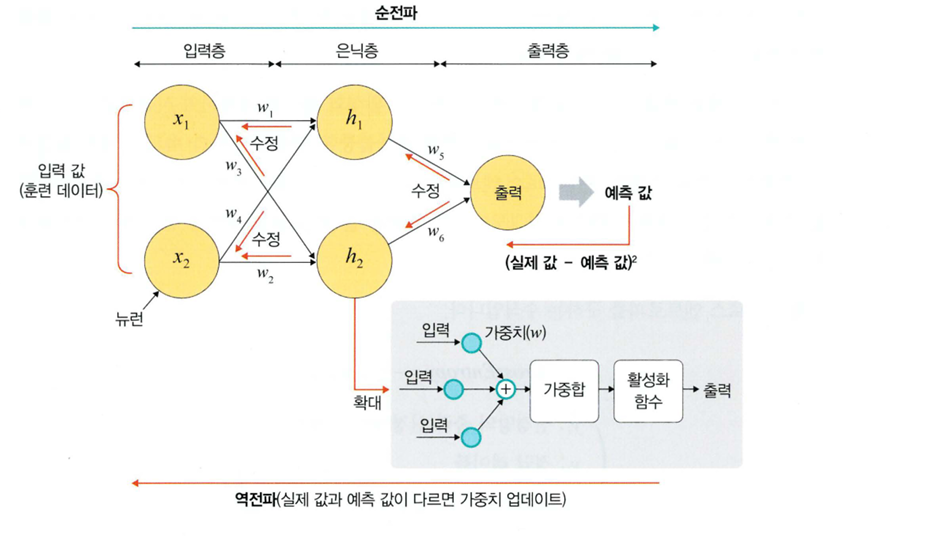


4.2.3 딥러닝의 문제점과 해결 방안

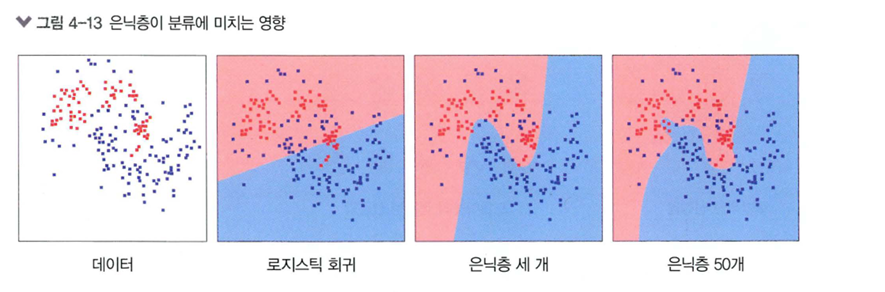

- 활성화 함수가 적용된 여러 은닉층을 결합해 비선형 영역을 표현하는것이 딥러닝. 은닉층이 많을수록 데이터 분류가 잘 되지만, 여러 문제 발생

- 과적합 문제 발생: 훈련 데이터를 과하게 학습해서 발생. 검증 데이터에 대한 오차가 증가
    - 드롭아웃: 과적합을 피하기 위해 임의로 일부 노드들을 학습에서 제외
    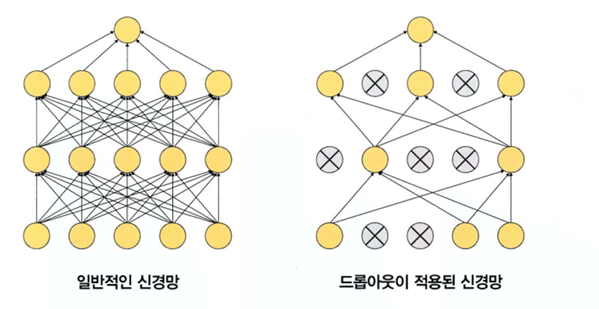

- 기울기 소멸 문제 발생: 은닉층이 많은 신경망에서 주로 발생. 은닉층으로 전달되는 오차가 크게 줄어 기울기가 소멸해 수렴되고 학습이 되지 않는 현상.
    - 시그모이드나 하이퍼볼릭 탄젠트 대신 렐루 활성화 함수 사용으로 해결
    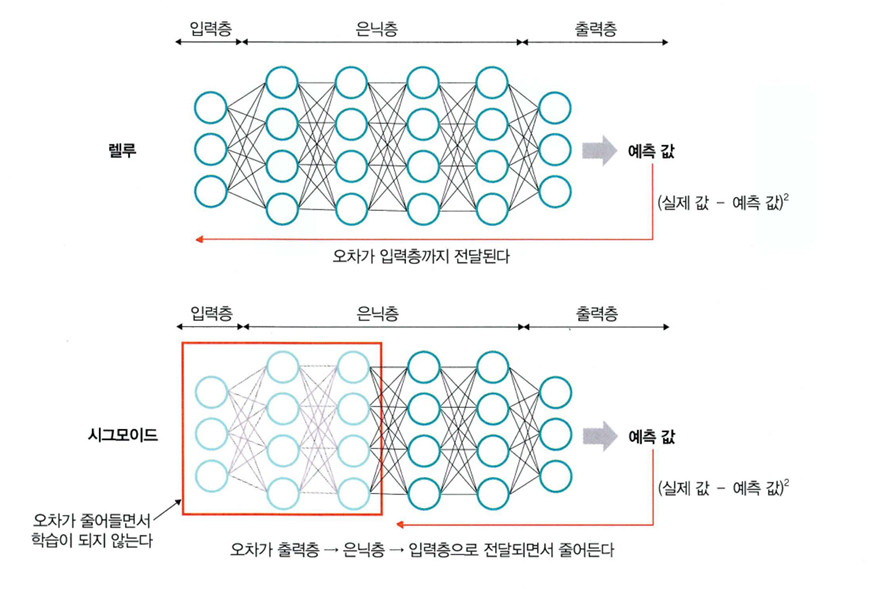



In [ ]:
# 드롭아웃 파이토치에서 구현
class DropoutModel(torch.nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer1 = torch.nn.Linear(784, 1200)
        self.dropout1 = torch.nn.Dropout(0.5)    # 50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미
        self.layer2 = torch.nn.Linear(1200, 1200)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.layer3 = torch.nn.Linear(1200, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)
        return self.layer3(x)

- 성능이 나빠지는 문제: 경사 하강법에서 성능이 안좋아지는 경우
    - 배치 경사 하강법: 전체 데이터 셋에 대한 오류를 구한 뒤 기울기를 한번만 계산해 파라미터 업데이트. 전체 훈련 데이터셋에 대해 가중치를 편미분함. 한번에 모든 훈련셋을 사용
    - 확률적 경사 하강법: 임의로 선택한 데이터의 기울기를 계산. 적은 데이터 사용해 속도가 빠름
    - 미니 배치 경사 하강법: 미니 배치 한개마다 기울기를 구한 후 평균 기울기로 업데이트 학습. 안정적이고 속도도 빠름
    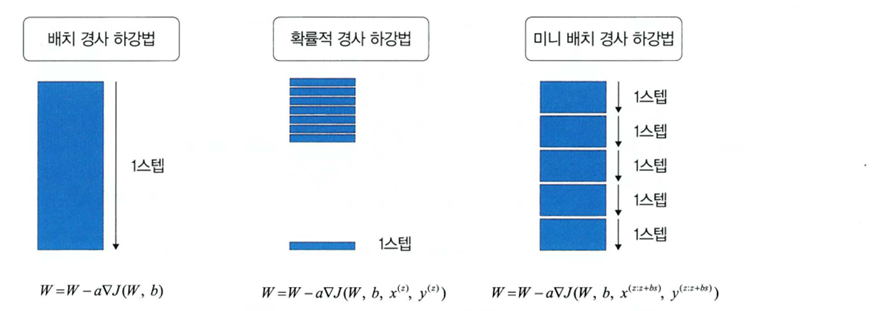
    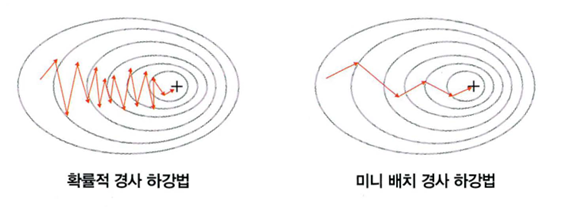
  
```
# 미니 배치 경사 하강법 구현
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
        self.y_data = [[12], [18], [11]]
        def __len__(self):
            return len(self.x_data)
        def __getitem__(self, idx):
            x = torch.FloatTensor(self.x_data[idx])
            y = torch.FloatTensor(self.y_data[idx])
            return x, y
dataset = CustomDataset()
dataloader = DataLoader(dataset,       # 데이터셋
                        batch_size=2,  # 미니 배치 크기로 2의 제곱수를 사용하겠다는 의미
                        shuffle=True)  # 데이터를 불러올 때마다 랜덤으로 섞어서 가져옴

```

4.2.4 딥러닝을 사용할 때 이점

- 특성 추출: 데이터별로 어떤 특징이 있는지 찾아내고, 데이터를 벡터로 변환. 머신러닝 모델들의 특성 추출은 매우 복잡하고 전문 지식이 필요하지만 딥러닝은 특성 추출 과정을 알고리즘에 통합시킴. (은닉층을 깊게 쌓음)

- 빅데이터의 효율적 활용: 딥러닝 학습을 이용한 특성 추출을 데이터가 클수록 성능이 향상됨. 데이터가 작다면 머신러닝을 고려해야함

### **4.3 딥러닝 알고리즘**

모두 심층 신경망을 사용한다

4.3.1 심층 신경망(DNN)

- 입력층과 출력층 사이에 다수의 은닉층을 포함하는 인공 신경망
- 다양한 비선형 관계 학습, 분류 가능. 기울기 소멸 문제 해결을 위해 드롭아웃, 렐루 함수, 배치 정규화 등의 적용 필요
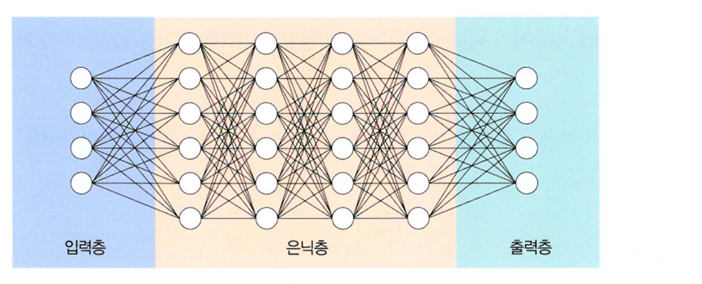

4.3.2 합성곱 신경망

- 합성곱층, 훌링층을 포함하는 이미지 처리 성능이 좋은 인공 신경망 알고리즘
- 이미지 데이터에서 객체 탐색, 위치, 패턴 찾는데 유용
- 층을 더 깊에 쌓은 신경망: VGG, GoogLeNet, ResNet -> 복수 필터로 이미지의 특징 추출 및 학습, 풀링층이 있음. 필터를 공유 파라니터로 사용
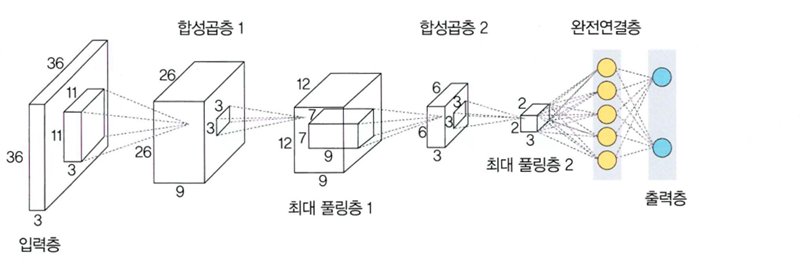

4.3.3 순환 신경망

- 시간 흐름에 따라 변화하는 데이터를 학습하기 위한 인공 신경망
- 현재 결과가 이전 결과와 연관이 있음
- 시간성 정보를 이용하여 특징을 잘 다룸. 데이터는 동적이고 길이가 가변적. 매우 긴 데이터를 처리하는 연구가 진행중
- 기울기 소멸 문제를 해결하고자 메모리 개념을 도입한 LSTM을 순환 신경망에서 사용
- 자연어 처리 분야에서도 많이 사용
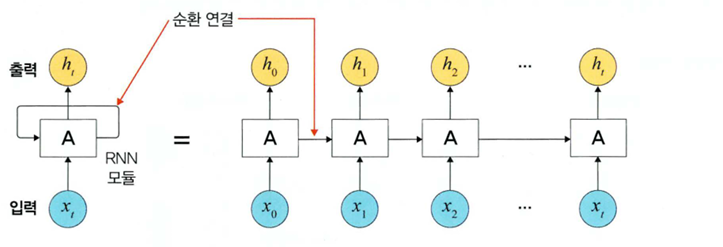

4.3.4 제한된 볼츠만 머신

- 가시층과 은닉층으로 구성된 모델. 가시층은 은닉층과만 연결됨.(가시층 간, 은닉층 간의 연결 X)
- 차원 감소, 분류, 선형 회귀 분석, 협업 필터링, 특성 값 학습, 주제 모델링에 사용
- 기울기 소멸 문제 해결 위해 사전 학습 용도로 활용가능, 심층 신뢰 신경망의 요소로 활용
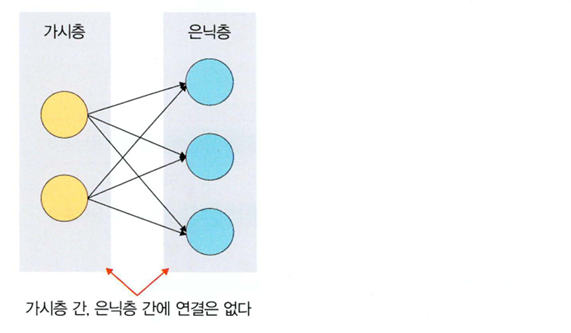


4.3.5 심층 신뢰 신경망

- 입력층과 은닉층으로 구성된 제한된 볼츠만 머신을 블록처럼 여러층으로 쌓은 형태로 연결된 신경망. 사전 훈련된 제한된 볼츠만 머신을 층층이 쌓은 구조
- 비지도 학습 가능. 부분적 이미지에서 전체 연상하는 일반화/추상화 구현에 유용
- 순차적으로 심층 신뢰 신경망 학습시켜 계층적 구조 생성
- 위로 올라갈수록 추상적 특성 추출. 학습된 가중치를 다층 퍼셉트론의 가중치 초깃값으로 사용
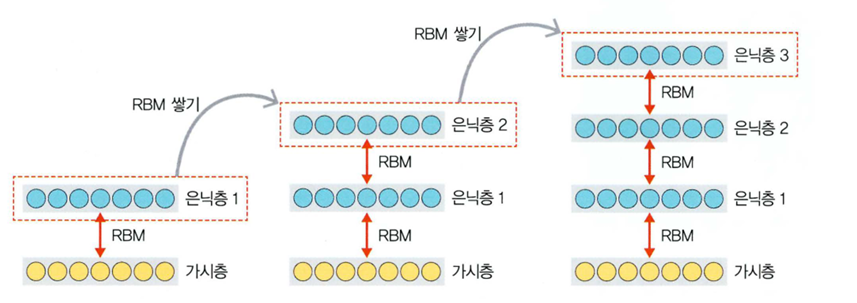


### **4.4 우리는 무엇을 배워야할까?**

데이터를 활용해 얻고자 하는 것에 따라 머신러닝이라 딥러닝을 선택해 학습하고 데이터 훈련하면 됨. 데이터를 수집하고 분석하는 사람이 성능 좋은 걸 선택.
  - 간단한 선형 회귀분류 -> 머신러닝
  - 복잡한 비선형 데이터 분류 -> 딥러닝